# <font color="green">Learning Curve Results</font>

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_hist(folder, epoch_number):
    hist_sum_loss = np.zeros(epoch_number)
    hist_sum_acc = np.zeros(epoch_number)
    hist_sum_acc_val = np.zeros(epoch_number)
    hist_sum_loss_val = np.zeros(epoch_number)
    file_names = os.listdir(folder)
    for file in file_names:
        file_name = folder+str(file)
        with open(file_name, 'rb') as fp:
            hist = pickle.load(fp)
            hist_sum_loss += np.array(hist['loss'])
            hist_sum_acc += np.array(hist['acc'])
            hist_sum_acc_val += np.array(hist['val_acc'])
            hist_sum_loss_val += np.array(hist['val_loss'])
            
    return hist_sum_acc, hist_sum_loss, hist_sum_acc_val, hist_sum_loss_val


In [3]:
def plot_loss(file_name, hist_sum_loss_mean, hist_sum_loss_val_mean, legend_1, legend_2):
    
    plt.plot(hist_sum_loss_mean)
    plt.plot(hist_sum_loss_val_mean)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend([legend_1, legend_2], loc='upper right')
    plt.savefig('{0}_loss.png'.format(file_name))
    plt.show()
    

In [4]:
def plot_accuracy(file_name, hist_sum_acc_mean, hist_sum_acc_val_mean, legend_1, legend_2):
    plt.plot(hist_sum_acc_mean)
    plt.plot(hist_sum_acc_val_mean)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend([legend_1, legend_2], loc='lower right')
    plt.savefig('{0}_accuracy.png'.format(file_name))
    plt.show()


In [6]:
folder = '/home/sefika/adversarial_examples_parseval_net/src/logs/history/'
import os
from os import listdir
from os.path import isfile, join

files = os.listdir(folder)


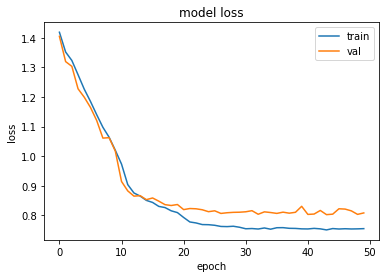

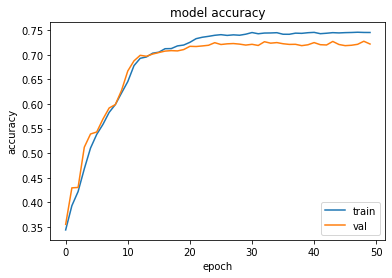

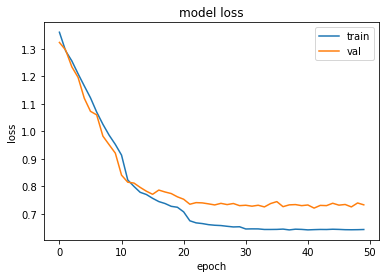

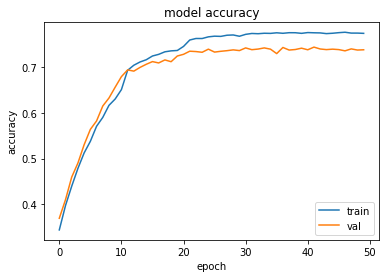

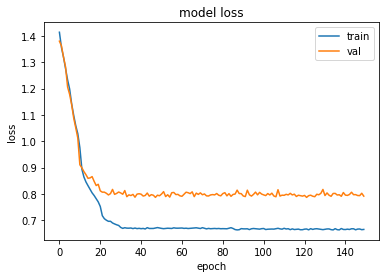

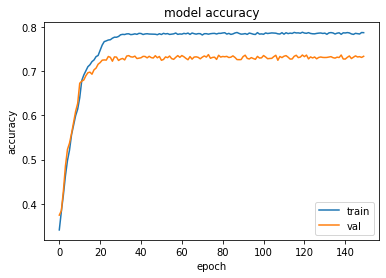

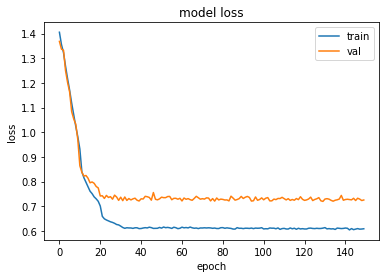

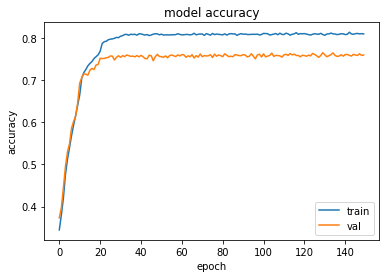

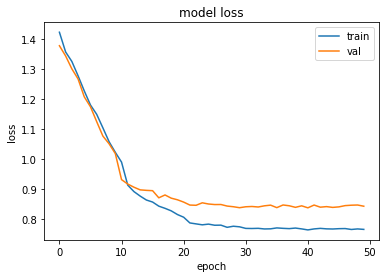

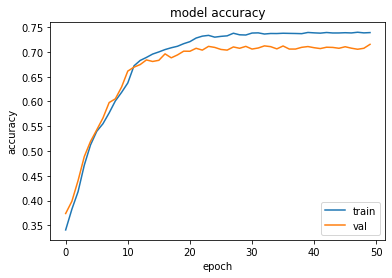

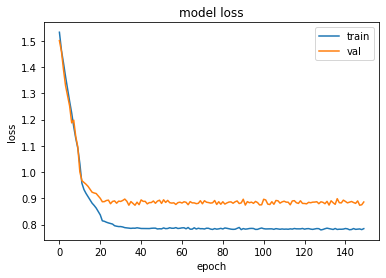

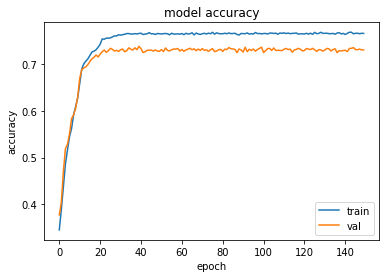

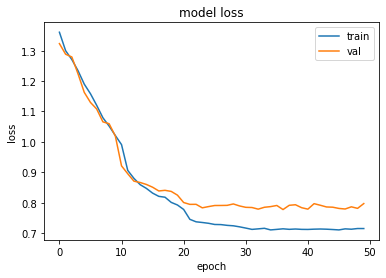

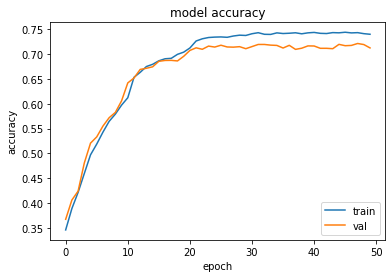

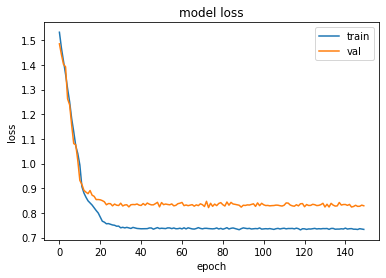

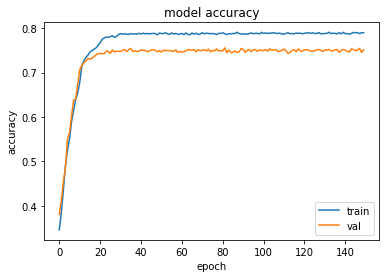

In [7]:
epoch_list = [50,50,150,150,50,150,50,150]
images_folder = "/home/sefika/adversarial_examples_parseval_net/src/logs/images/"
for i, file in enumerate(files):
    path = folder+str(file)+'/'
    sum_acc, sum_loss, sum_acc_val, sum_loss_val = load_hist(path, epoch_list[i])
    hist_sum_loss_mean = sum_loss/10
    hist_sum_acc_mean = sum_acc/10
    hist_sum_acc_val_mean = sum_acc_val/10
    hist_sum_loss_val_mean = sum_loss_val/10
    file_name1 = images_folder+str(file)
    file_name2 = images_folder+str(file)
    plot_loss(file_name1, hist_sum_loss_mean, hist_sum_loss_val_mean, 'train', 'val')
    plot_accuracy(file_name2, hist_sum_acc_mean, hist_sum_acc_val_mean, 'train', 'val')
    
    

# <font color="green">Adversarial Training</font>

## <font color="blue">Parseval</font>

In [13]:
folder = '/home/sefika/adversarial_examples_parseval_net/src/logs/history/Parseval_Adv/'

In [14]:
hist_sum_acc, hist_sum_loss, hist_sum_acc_val, hist_sum_loss_val = load_hist(folder, 50)
hist_sum_loss_mean = hist_sum_loss/10
hist_sum_acc_mean = hist_sum_acc/10
hist_sum_acc_val_mean = hist_sum_acc_val/10
hist_sum_loss_val_mean = hist_sum_loss_val/10

## <font color="blue">ResNet</font>

In [17]:
folder = '/home/sefika/adversarial_examples_parseval_net/src/logs/history/ResNet_Adv/'
hist_sum_acc_res, hist_sum_loss_res, hist_sum_acc_val_res, hist_sum_loss_val_res = load_hist(folder,50)
hist_res_sum_loss_mean = hist_sum_loss_res/10
hist_res_sum_acc_mean = hist_sum_acc_res/10
hist_res_sum_acc_val_mean = hist_sum_acc_val_res/10
hist_res_sum_loss_val_mean = hist_sum_loss_val_res/10

## <font color="magenta">Compare Models</font>

In [18]:
path_image = images_folder+"compare_ResNetvsParseval_adversarial"

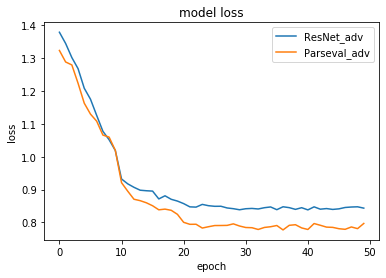

In [19]:
plot_loss(path_image, hist_res_sum_loss_val_mean, hist_sum_loss_val_mean, 'ResNet_adv', 'Parseval_adv')

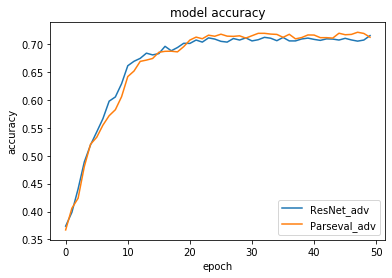

In [20]:
plot_accuracy(path_image, hist_res_sum_acc_val_mean, hist_sum_acc_val_mean, 'ResNet_adv', 'Parseval_adv')

# Advanced Model

In [21]:
folder = '/home/sefika/adversarial_examples_parseval_net/src/logs/history/Parseval_2_Adv/'

In [23]:
hist_sum_acc, hist_sum_loss, hist_sum_acc_val, hist_sum_loss_val = load_hist(folder, 150)
hist_sum_loss_mean = hist_sum_loss/10
hist_sum_acc_mean = hist_sum_acc/10
hist_sum_acc_val_mean = hist_sum_acc_val/10
hist_sum_loss_val_mean = hist_sum_loss_val/10

In [24]:
folder = '/home/sefika/adversarial_examples_parseval_net/src/logs/history/SimpleWRN_2_Adv/'
hist_sum_acc_res, hist_sum_loss_res, hist_sum_acc_val_res, hist_sum_loss_val_res = load_hist(folder,150)
hist_res_sum_loss_mean = hist_sum_loss_res/10
hist_res_sum_acc_mean = hist_sum_acc_res/10
hist_res_sum_acc_val_mean = hist_sum_acc_val_res/10
hist_res_sum_loss_val_mean = hist_sum_loss_val_res/10

In [25]:
path_image = images_folder+"compare_ResNetvsParseval_adversarial_for_advanceModel"

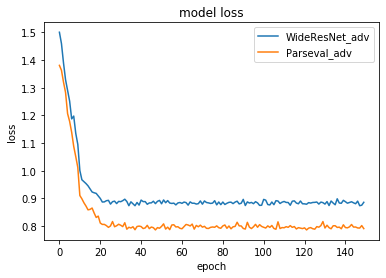

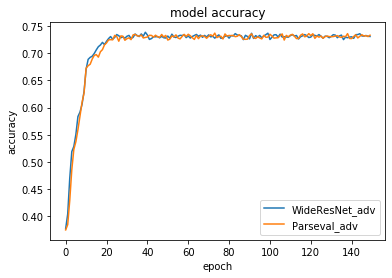

In [26]:
plot_loss(path_image, hist_res_sum_loss_val_mean, hist_sum_loss_val_mean, 'WideResNet_adv', 'Parseval_adv')
plot_accuracy(path_image, hist_res_sum_acc_val_mean, hist_sum_acc_val_mean, 'WideResNet_adv', 'Parseval_adv')

# <font color="purple">Conclusion</font>

It can be seen that Parseval network has better performance than ResNet